In [73]:
import os
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (15, 5)

In [2]:
d = np.fromfile('/Users/Edu/data/yass/sample_100k.bin', dtype='int16')

In [3]:
d.shape

(700000,)

In [4]:
d = d.reshape((100000,7))

In [5]:
z = np.zeros((60,7))
d2 = np.concatenate((z, d, z))

In [6]:
d2.shape

(100120, 7)

# Raw data

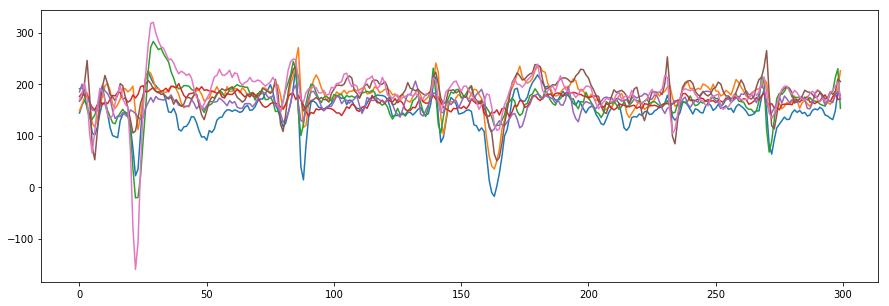

In [48]:
for i in d.T:
    plt.plot(i[-300:])
plt.show()

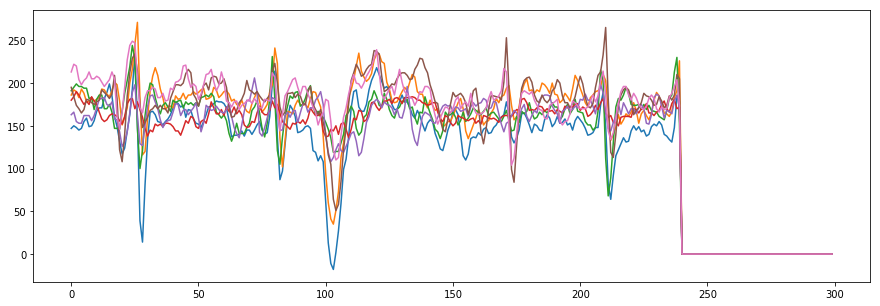

In [49]:
for i in d2.T:
    plt.plot(i[-300:])
plt.show()

In [27]:
from yass.preprocess import filter, standarize
from yass.config import Config

In [8]:
! pwd

/Users/Edu/dev/grossman/yass-private/notebooks


In [68]:
cfg = Config.from_yaml('../config/threshold.yaml')

In [10]:
filtered = filter.butterworth(d, cfg.filterLow, cfg.filterHighFactor,
                    cfg.filterOrder, cfg.srate)

In [11]:
filtered2 = filter.butterworth(d2, cfg.filterLow, cfg.filterHighFactor,
                    cfg.filterOrder, cfg.srate)

In [12]:
filtered.shape

(100000, 7)

# Filtered

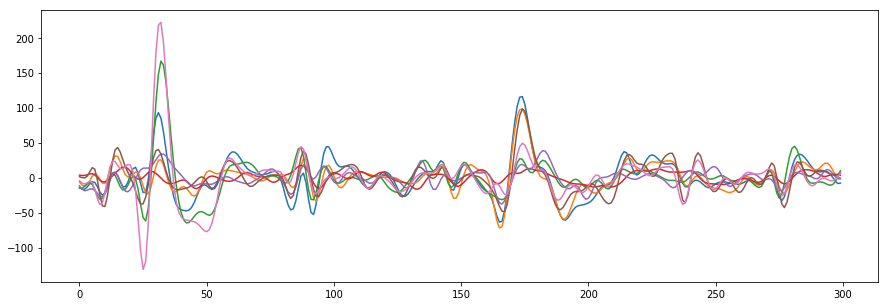

In [50]:
for i in filtered.T:
    plt.plot(i[-300:])
plt.show()

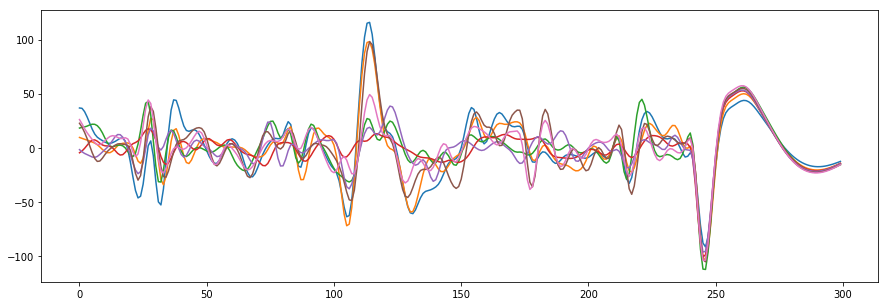

In [51]:
for i in filtered2.T:
    plt.plot(i[-300:])
plt.show()

In [28]:
standarized = standarize.standarize(filtered, _sd=standarize.sd(filtered, cfg.srate))

In [29]:
standarized2 = standarize.standarize(filtered2, _sd=standarize.sd(filtered, cfg.srate))

# Standarized

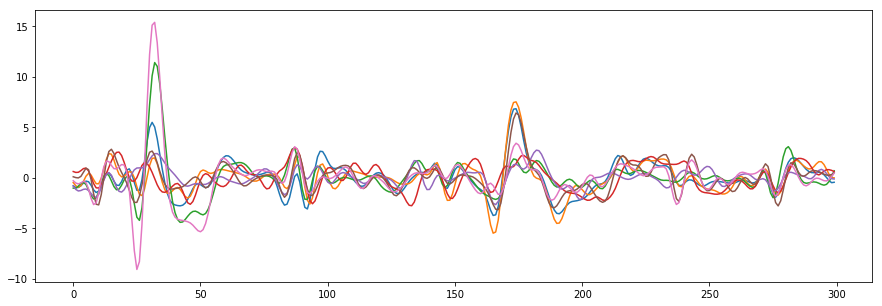

In [52]:
for i in standarized.T:
    plt.plot(i[-300:])
plt.show()

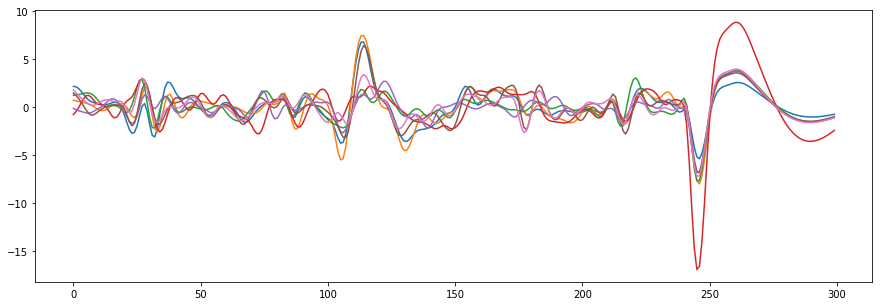

In [53]:
for i in standarized2.T:
    plt.plot(i[-300:])
plt.show()

In [58]:
standarized.T.shape

(7, 100000)

# Whitened

In [69]:
whitened = filter.whiten(standarized, cfg.neighChannels, cfg.spikeSize)
whitened2 = filter.whiten(standarized2, cfg.neighChannels, cfg.spikeSize)

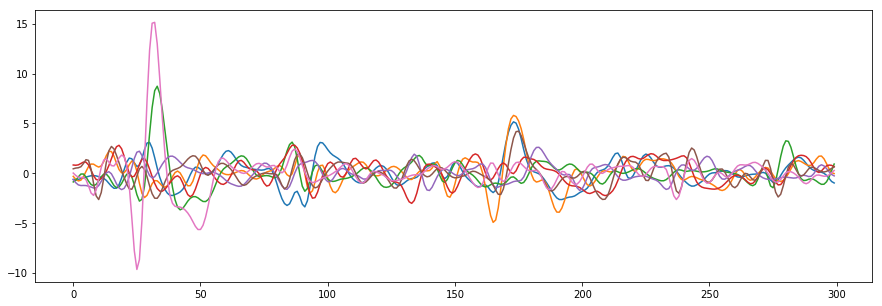

In [70]:
for i in whitened.T:
    plt.plot(i[-300:])
plt.show()

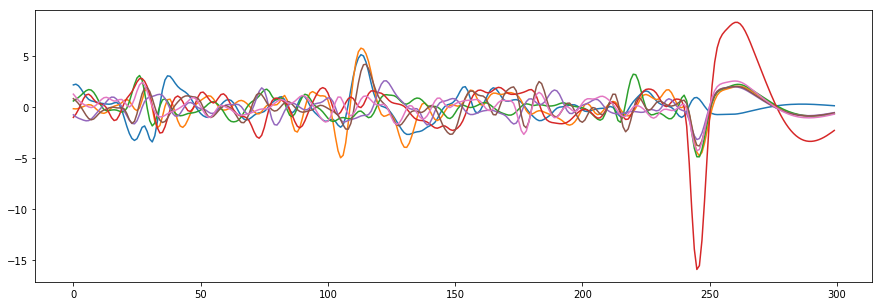

In [71]:
for i in whitened2.T:
    plt.plot(i[-300:])
plt.show()

In [90]:
cfg.dtype

'int16'

In [103]:
chunk.shape[0]*chunk.shape[1]

700840

In [128]:
whitened.shape

(100000, 7)

In [116]:
w = open(os.path.join(cfg.root, 'tmp/w.bin'), 'wb')
chunk = whitened*cfg.scaleToSave
chunk = chunk.reshape(chunk.shape[0]*chunk.shape[1])
chunk.astype(cfg.dtype).tofile(w)
w.close()

In [129]:
whitened2.shape

(100120, 7)

In [121]:
w2 = open(os.path.join(cfg.root, 'tmp/w2.bin'), 'wb')
chunk = whitened2*cfg.scaleToSave
chunk = chunk.reshape(chunk.shape[0]*chunk.shape[1])
chunk.astype(cfg.dtype).tofile(w2)
w2.close()

# Load back

In [130]:
f = open(os.path.join(os.path.join(cfg.root, 'tmp/w.bin')), 'rb').read()
wload = np.fromstring(f, dtype='int16')
wload = np.reshape(wload, (-1, 7))
wload = wload.astype('float32')/cfg.scaleToSave
wload.shape

(100000, 7)

In [132]:
f = open(os.path.join(os.path.join(cfg.root, 'tmp/w2.bin')), 'rb').read()
wload = np.fromstring(f, dtype='int16')
wload = np.reshape(wload, (-1, 7))
wload = wload.astype('float32')/cfg.scaleToSave
wload.shape

(100120, 7)

In [153]:
(whitened*100).astype('int16')[:1]

array([[ 0,  9,  7, 30,  6,  8,  7]], dtype=int16)

In [154]:
whitened[:1]*100

array([[ -0.57242859,   9.77189541,   7.85481858,  30.50961739,
          6.99503058,   8.08127247,   7.50801312]])

In [155]:
(whitened2*100).astype('int16')[:1]

array([[0, 0, 0, 0, 0, 0, 0]], dtype=int16)

In [156]:
(whitened2*100)[:1]

array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.]])

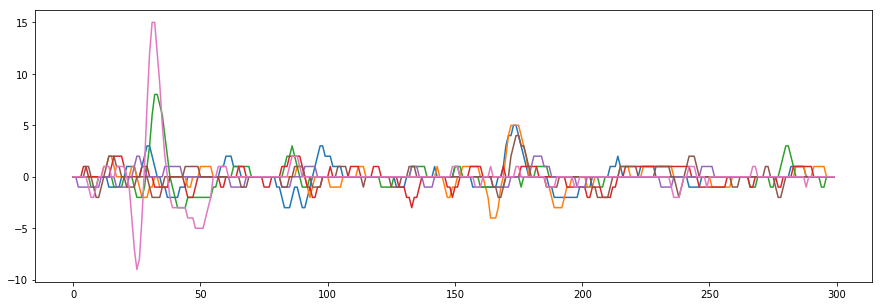

In [135]:
for i in whitened.astype('int16').T:
    plt.plot(i[-300:])
plt.show()

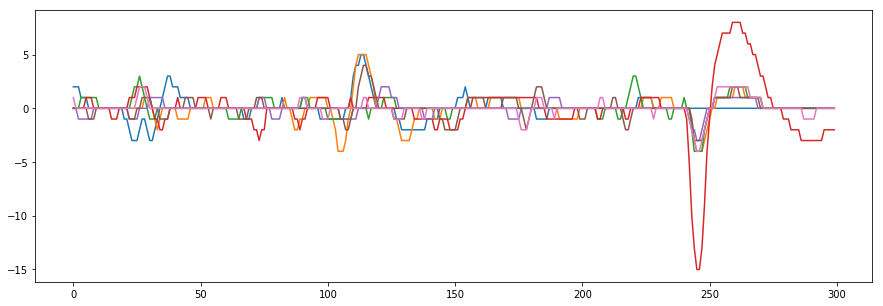

In [137]:
for i in whitened2.astype('int16').T:
    plt.plot(i[-300:])
plt.show()